# Colorize icons

### Setup path and get icons to colorize

In [73]:
import pathlib

from IPython.core.pylabtools import figsize

pathlib.Path("").parent.absolute()

def rgb_to_hsv(rgb):
    """Convert an RGB numpy array of shape (3,) to HSV."""
    rgb = np.array(rgb, dtype=np.uint8).reshape((1, 1, 3))  # Reshape for OpenCV
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    return hsv.flatten()  # Return as a 1D array

def hsv_to_rgb(hsv):
    """Convert an HSV numpy array of shape (3,) back to RGB."""
    hsv = np.array(hsv, dtype=np.uint8).reshape((1, 1, 3))  # Reshape for OpenCV
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return rgb.flatten()  # Return as a 1D array

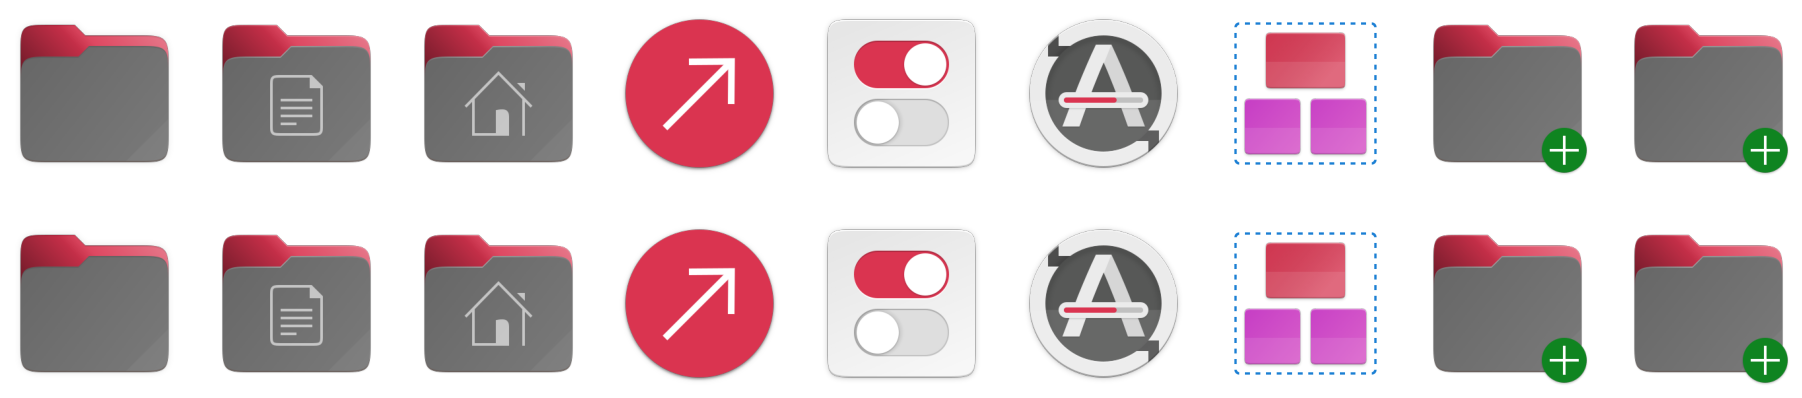

In [38]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


def skip(pixel_color: np.ndarray, threshold: float = 50.0):
    """
    Compute the distance between the given pixel and the original color theme of the icons set to tell if this pixel have to be skipped or colorized.
    It computes the distance between the pixel color and the theme color and returns True if the distance is above the given threshold.
    """
    global original_icons_theme_color
    distance = np.sqrt(np.sum((pixel_color - original_icons_theme_color) ** 2))
    return distance > threshold

def memorize_image(image: np.ndarray,
                   memory: dict,
                   colorize_entire_image: bool = False):
    """
    This function will be called to save information about the images.
    """
    pass

def colorize_image(image: np.ndarray,
                   memory: dict,
                   destination_color=np.array([0, 0, 255]),
                   colorize_entire_image: bool = False
                   ):
    """
    This function will be called to colorize the images.
    :param image: image to colorize.
    :return: colorized image.
    """
    return image

original_icons_theme_color = np.array([0, 0, 0])
def process_dataset(memorize_image_fun=memorize_image,
                    colorize_image_fun=colorize_image,
                    destination_color=np.array([0, 0, 255]),
                    colorize_entire_image: bool = False
                    ):
    global original_icons_theme_color
    source_icons_path = pathlib.Path("").parent.absolute() / 'icons' / 'hbicons-red' / "256x256" / "places"
    icons_to_colorize = [
        mpimg.imread(str(source_icons_path / image_file_name)) for image_file_name in ["folder.png", "folder-documents.png", "user-home.png"]
    ]
    icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "emblems" / "emblem-symbolic-link.png")))
    icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "apps" / "org.gnome.tweaks.png")))
    icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "apps" / "system-software-update.png")))
    icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "actions" / "stock_select-all.png")))
    icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "actions" / "folder_new.png")))
    icons_to_colorize.append(mpimg.imread(str(source_icons_path.parent / "actions" / "folder_new.png")))

    # Generate a memory of the dataset (extract needed information).
    memory = {}
    for icon in icons_to_colorize:
        memorize_image_fun(icon, memory, colorize_entire_image=colorize_entire_image)

    colorized_images = []
    for icon in icons_to_colorize:
        colorized_images.append(colorize_image_fun(icon, memory, destination_color=destination_color, colorize_entire_image=colorize_entire_image))

    # Plot results
    # > Plot the input images
    fig, axs = plt.subplots(2, len(icons_to_colorize), figsize=(23, 5))
    for i in range(len(icons_to_colorize)):
        axs[0][i].set_axis_off()
        axs[0][i].imshow(icons_to_colorize[i])

    # > Plot the output images
    for i in range(len(colorized_images)):
        axs[1][i].set_axis_off()
        axs[1][i].imshow(colorized_images[i])
    plt.show()

process_dataset()

### Setup a source color to change

(218, 52, 80, 255)


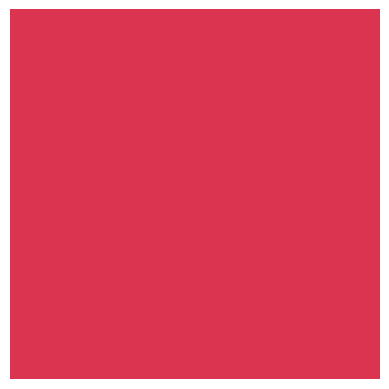

In [39]:
from PIL import Image
import numpy as np
import pathlib


# Get the current color of the copied directory

reference_icon_path = pathlib.Path("").parent.absolute() / 'icons' / 'hbicons-red' / "256x256" / "emblems" / "emblem-symbolic-link.png"
image = Image.open(reference_icon_path)         # Load the image
original_icons_theme_color = image.getpixel((100, 30))        # Get the color of the pixel at coordinates (x, y)
print(original_icons_theme_color)
color_img = np.zeros((256, 256, 4), dtype=np.int32)
color_img[:, :] = original_icons_theme_color
plt.cla()
plt.axis("off")
plt.imshow(color_img)
plt.show()

### Try to colorize it using opencv

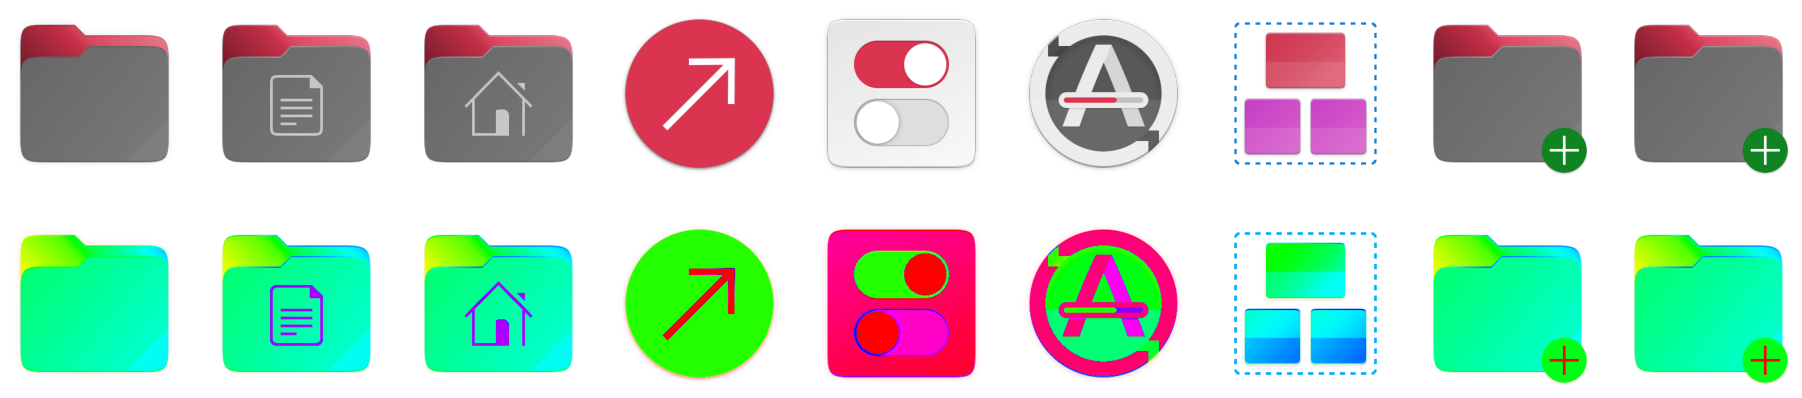

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def colorize_image_1(image: np.ndarray,
                     memory: dict,
                     destination_color=np.array([0, 0, 255]),
                     colorize_entire_image: bool = False):
    if image.dtype in [np.float32, np.float64]:
        image = (image * 255).astype(np.uint8)
    if image.shape[-1] == 4:  # If image has an alpha channel (RGBA)
        bgr = image[:, :, :3]  # Extract BGR channels
        alpha = image[:, :, 3]  # Extract Alpha channel

        # Convert to grayscale for color mapping
        gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

        # Apply a colormap (e.g., JET, VIRIDIS, MAGMA)
        colorized = cv2.applyColorMap(gray, cv2.COLORMAP_HSV)

        # Blend with transparency
        alpha_norm = alpha[:, :, None] / 255.0  # Normalize alpha to range 0-1
        blended = (colorized * alpha_norm + 255 * (1 - alpha_norm)).astype(np.uint8)

        # Convert BGR to RGB for Matplotlib
        return cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
    else:
        print("The image does not have an alpha channel.")


process_dataset(colorize_image_fun=colorize_image_1)

### Using logarithmic scale

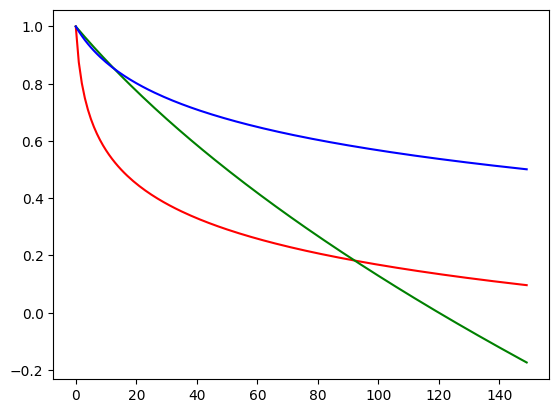

In [67]:
def scale(dist):
    return 1 - np.log(1 + dist) / np.log(1 + 255)
def scale_2(dist):
    return 1 - np.sqrt(1 + dist/40) + 1
def scale_3(dist):
    return 1 - np.log(1 + dist/10) / np.log(1 + 255)

x = [i for i in range(150)]
y = [scale(i) for i in x]
plt.plot(x, [scale(i) for i in x], color="red", label="log scale")
plt.plot(x, [scale_2(i) for i in x], color="green", label="sqrt scale")
plt.plot(x, [scale_3(i) for i in x], color="blue", label="delayed log scale")
plt.show()

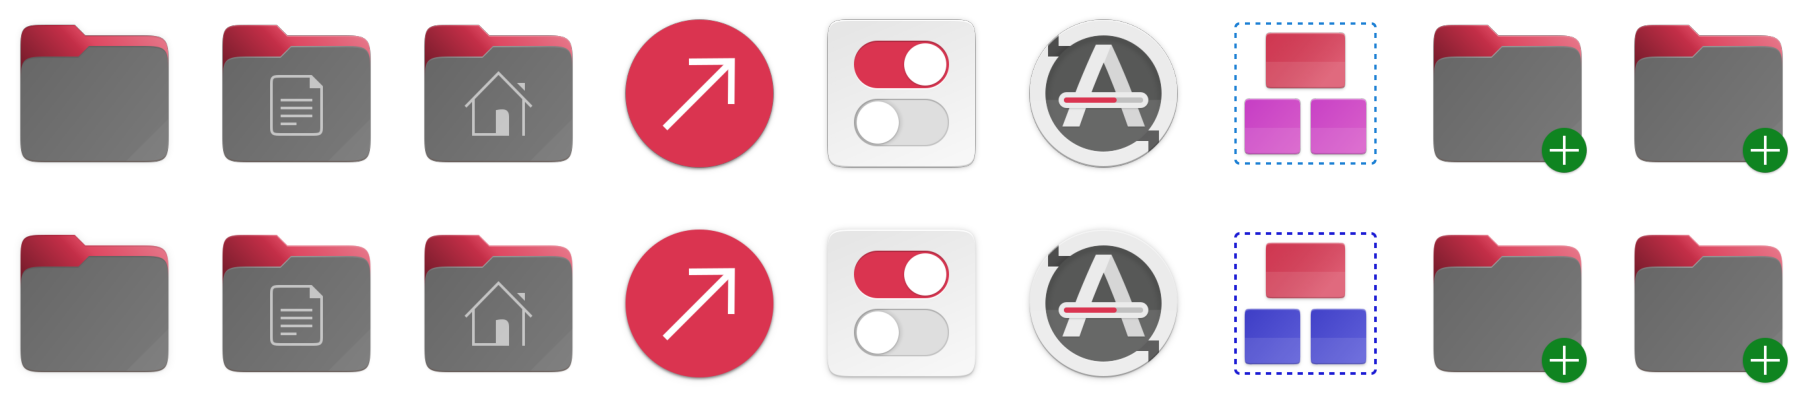

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys

def color_distance(c1, c2):
    """Calculate the Euclidean distance between two RGB colors."""
    return np.sqrt(np.sum((c1 - c2) ** 2))

def colorize_image_2(image, memory, destination_color, colorize_entire_image=False):
    """
    Colorize an image while preserving transparency.

    - image: (h, w, 4) RGBA image.
    - source_color: Color to start from (e.g., orange).
    - target_color: Color to transition towards (e.g., blue).
    """
    global original_icons_theme_color
    if image.dtype in [np.float32, np.float64]:
        image = (image * 255).astype(np.uint8)
    source_color = np.array(original_icons_theme_color[:3], dtype=float)
    target_color = np.array(destination_color, dtype=float)
    target_hsv = rgb_to_hsv(target_color)

    # Extract RGB and Alpha channels
    if image.shape[-1] == 4:  # If image is RGBA
        rgb = image[:, :, :3].astype(float)
        alpha = image[:, :, 3] / 255.0  # Normalize alpha to [0,1]
    else:
        rgb = image.astype(float)
        alpha = np.ones((image.shape[0], image.shape[1]))  # Fully opaque

    # Colorization logic
    height, width, _ = rgb.shape
    output_image = rgb.copy()

    for i in range(height):
        for j in range(width):
            pixel_color = rgb[i, j, :]
            pixel_hsv = rgb_to_hsv(pixel_color)

            # Calculate the distance from the source color
            # dist = color_distance(pixel_color, source_color)
            # sub = target_hsv[0] - pixel_hsv[0]
            # dist = np.abs(sub)
            dist = abs(int(target_hsv[0]) - int(pixel_hsv[0]))
            dist = min(dist, 180 - dist)  # Account for circular nature of hue


            # if dist > 50:
            #     continue

            new_color = pixel_hsv
            new_color[0] = target_hsv[0]
            new_color = hsv_to_rgb(new_color)

            # Apply logarithmic scaling
            #scale = 1 - np.log(1 + dist/3) / np.log(1 + 255)

            # Compute the color transition
            # modified_color = pixel_color + scale * (target_color - pixel_color)


            colorsys.hsv_to_rgb(0.25, 0.5, 0.4)

            output_image[i, j, :] = np.clip(new_color, 0, 255)

    # Convert back to uint8
    output_image = output_image.astype(np.uint8)

    # Blend with a white background to remove the black border effect
    white_bg = np.full_like(output_image, 255)  # Create a white background
    blended_image = (output_image * alpha[:, :, None] + white_bg * (1 - alpha[:, :, None])).astype(np.uint8)

    return blended_image

process_dataset(colorize_image_fun=colorize_image_2)


In [ ]:
from PIL import Image, ImageEnhance, ImageOps
import os
import pathlib

# Define your custom color
c = "a"

COLORIZE_HEX = "#" + c * 6

# Convert hex to RGB
hex_to_rgb = lambda h: tuple(int(h[i:i+2], 16) for i in (1, 3, 5))
COLORIZE_RGB = hex_to_rgb(COLORIZE_HEX)

# Base directory for icons
ICON_DIR = str(pathlib.Path(__file__).parent.absolute())

# Process all PNG images recursively
def process_images():
    for root, _, files in os.walk(ICON_DIR):
        for file in files:
            if file.endswith(".png"):
                img_path = os.path.join(root, file)
                print(f"Processing: {img_path}")

                # Open image with RGBA (includes alpha channel)
                img = Image.open(img_path).convert("RGBA")

                # Split the image into its RGBA channels
                r, g, b, a = img.split()

                # Convert RGB to grayscale and normalize it
                grayscale = ImageOps.grayscale(Image.merge("RGB", (r, g, b)))

                # Normalize grayscale to [0, 255] range to ensure consistency across images
                min_val = min(grayscale.getdata())
                max_val = max(grayscale.getdata())
                normalized = grayscale.point(lambda p: 255 * (p - min_val) / (max_val - min_val) if max_val != min_val else p)

                # Apply color tint to the normalized grayscale image
                colorized = ImageOps.colorize(normalized, black="black", white=COLORIZE_RGB)

                # Optionally, enhance the contrast to match the lightness of folder-document.png
                enhancer = ImageEnhance.Contrast(colorized)
                colorized = enhancer.enhance(1.2)  # Adjust contrast (1.2 is an example, tweak as needed)

                # Merge the colorized image back with the original alpha channel
                img = Image.merge("RGBA", (colorized.split()[0], colorized.split()[1], colorized.split()[2], a))

                # Save the colorized image
                img.save(img_path)
                print(f"Saved: {img_path}")

if __name__ == "__main__":
    process_images()
    print("All icons have been colorized!")


### Now with our image

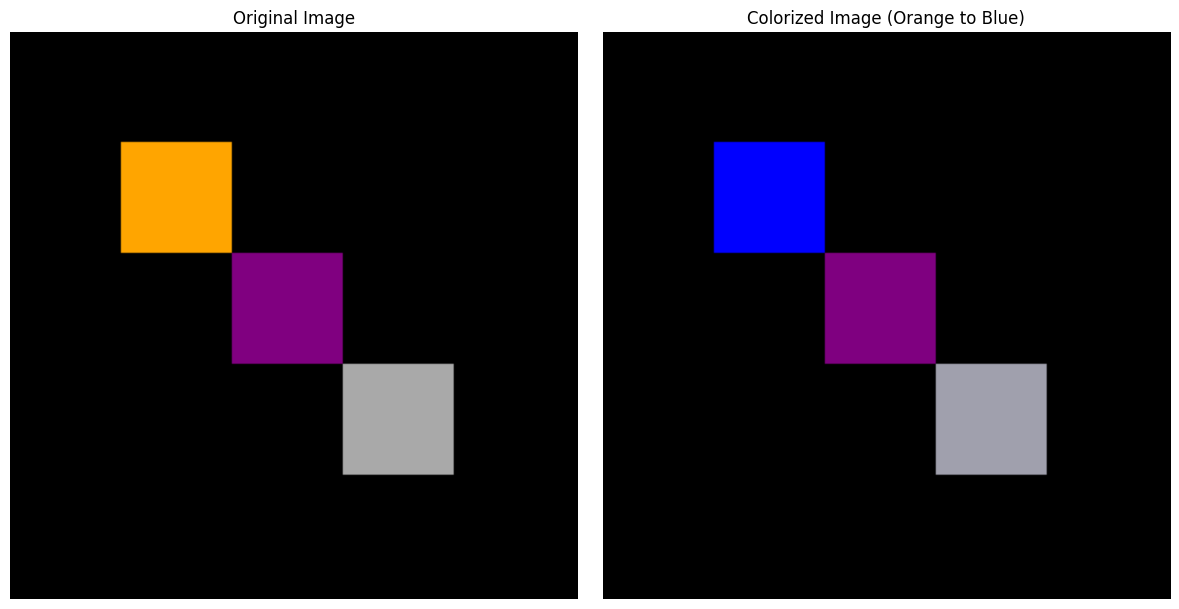

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def color_distance(c1, c2):
    """
    Calculate the Euclidean distance between two RGB colors.
    c1, c2 are numpy arrays of shape (3,) representing RGB colors.
    """
    return np.sqrt(np.sum((c1 - c2) ** 2))

def colorize_image(image, source_color, target_color, max_distance=255, log_base=2):
    """
    Colorize an image by transitioning from source_color to target_color.

    Args:
    - image: (h, w, 3) RGB image.
    - source_color: The color to start the transition from (e.g., orange).
    - target_color: The color to transition towards (e.g., blue).
    - max_distance: The maximum distance for the color change effect.
    - log_base: Base for the logarithmic scale controlling the strength of the change.

    Returns:
    - A colorized image.
    """
    # Normalize source_color and target_color to numpy arrays
    source_color = np.array(source_color, dtype=float)
    target_color = np.array(target_color, dtype=float)

    # Calculate the color distance for each pixel
    height, width, _ = image.shape
    output_image = image.astype(float)

    for i in range(height):
        for j in range(width):
            # Get the current pixel's color
            pixel_color = image[i, j, :]

            # Calculate the distance between the pixel color and the source color
            dist = color_distance(pixel_color, source_color)

            # Apply logarithmic scaling to determine how much to modify the color
            scale = 1 - np.log(1 + dist) / np.log(1 + max_distance)  # Logarithmic scaling

            # Compute the color transition based on the scale
            modified_color = pixel_color + scale * (target_color - pixel_color)

            # Make sure the color stays within [0, 255]
            output_image[i, j, :] = np.clip(modified_color, 0, 255)

    return output_image.astype(np.uint8)

# Example Usage:

# Create an example image with a few colors
h, w = 256, 256
image = np.zeros((h, w, 3), dtype=np.uint8)

# Example: fill some areas with different colors
image[50:100, 50:100] = [255, 165, 0]  # Orange
image[100:150, 100:150] = [128, 0, 128]  # Purple
image[150:200, 150:200] = [169, 169, 169]  # Grey

# Define source (orange) and target (blue) colors
source_color = [255, 165, 0]  # Orange
target_color = [0, 0, 255]  # Blue

# Colorize the image
colorized_image = colorize_image(image, source_color, target_color)

# Plot the original and colorized images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show colorized image
axs[1].imshow(colorized_image)
axs[1].set_title("Colorized Image (Orange to Blue)")
axs[1].axis('off')

plt.tight_layout()
plt.show()

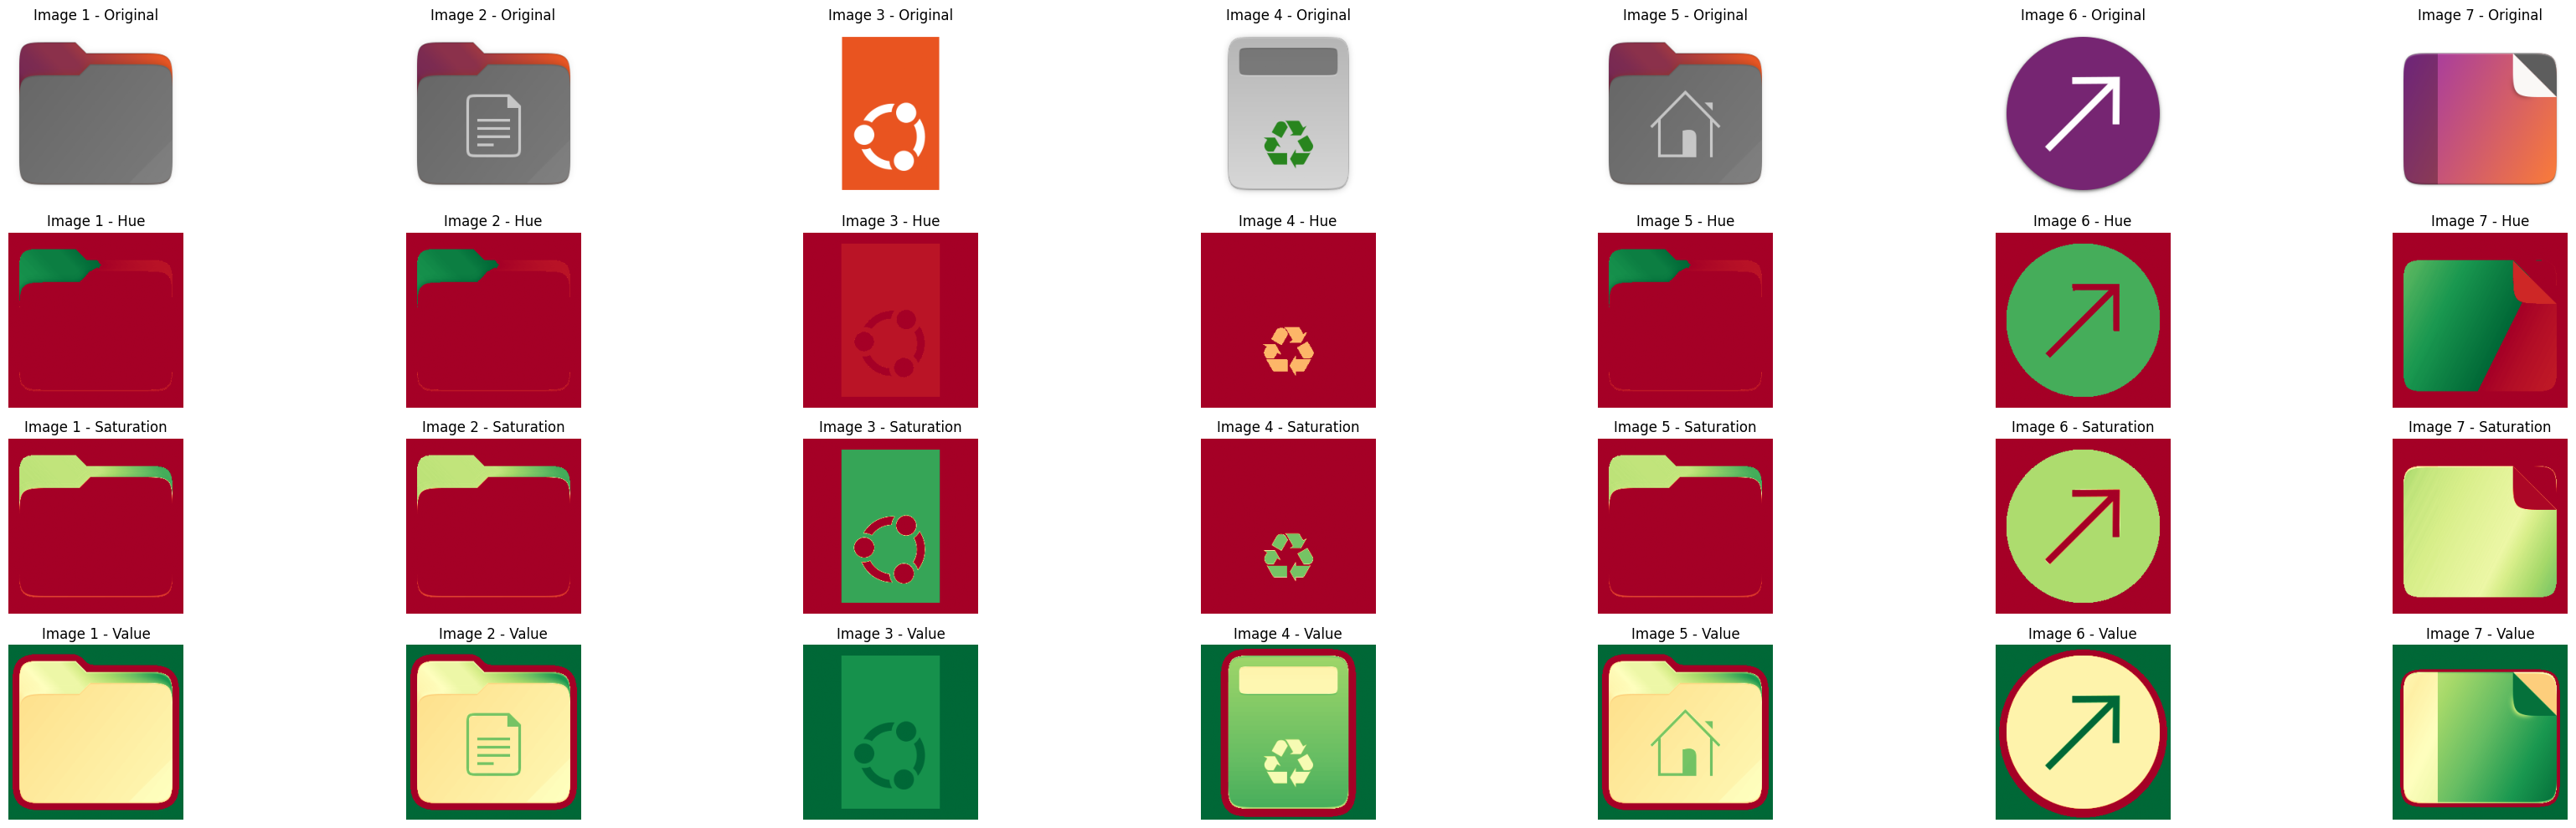

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

# Define colormap (Red = low, Green = high)
cmap = plt.cm.RdYlGn

# Number of images
num_images = len(icons_to_colorize)

# Create a figure with (3 rows, num_images columns)
fig, axs = plt.subplots(4, num_images, figsize=(5 * num_images, 10))

# Iterate over images
for i in range(num_images):
    # Convert RGB to HSV
    hsv_img = rgb_to_hsv(icons_to_colorize[i][:, :, :3])  # Ensure shape (H, W, 3)

    # Extract H, S, V components
    hue = hsv_img[:, :, 0]
    saturation = hsv_img[:, :, 1]
    value = hsv_img[:, :, 2]

    # Plot normal
    axs[0, i].imshow(icons_to_colorize[i])
    axs[0, i].set_title(f"Image {i+1} - Original")
    axs[0, i].axis("off")

    # Plot Hue
    axs[1, i].imshow(hue, cmap=cmap, vmin=0, vmax=1)
    axs[1, i].set_title(f"Image {i+1} - Hue")
    axs[1, i].axis("off")

    # Plot Saturation
    axs[2, i].imshow(saturation, cmap=cmap, vmin=0, vmax=1)
    axs[2, i].set_title(f"Image {i+1} - Saturation")
    axs[2, i].axis("off")

    # Plot Value
    axs[3, i].imshow(value, cmap=cmap, vmin=0, vmax=1)
    axs[3, i].set_title(f"Image {i+1} - Value")
    axs[3, i].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


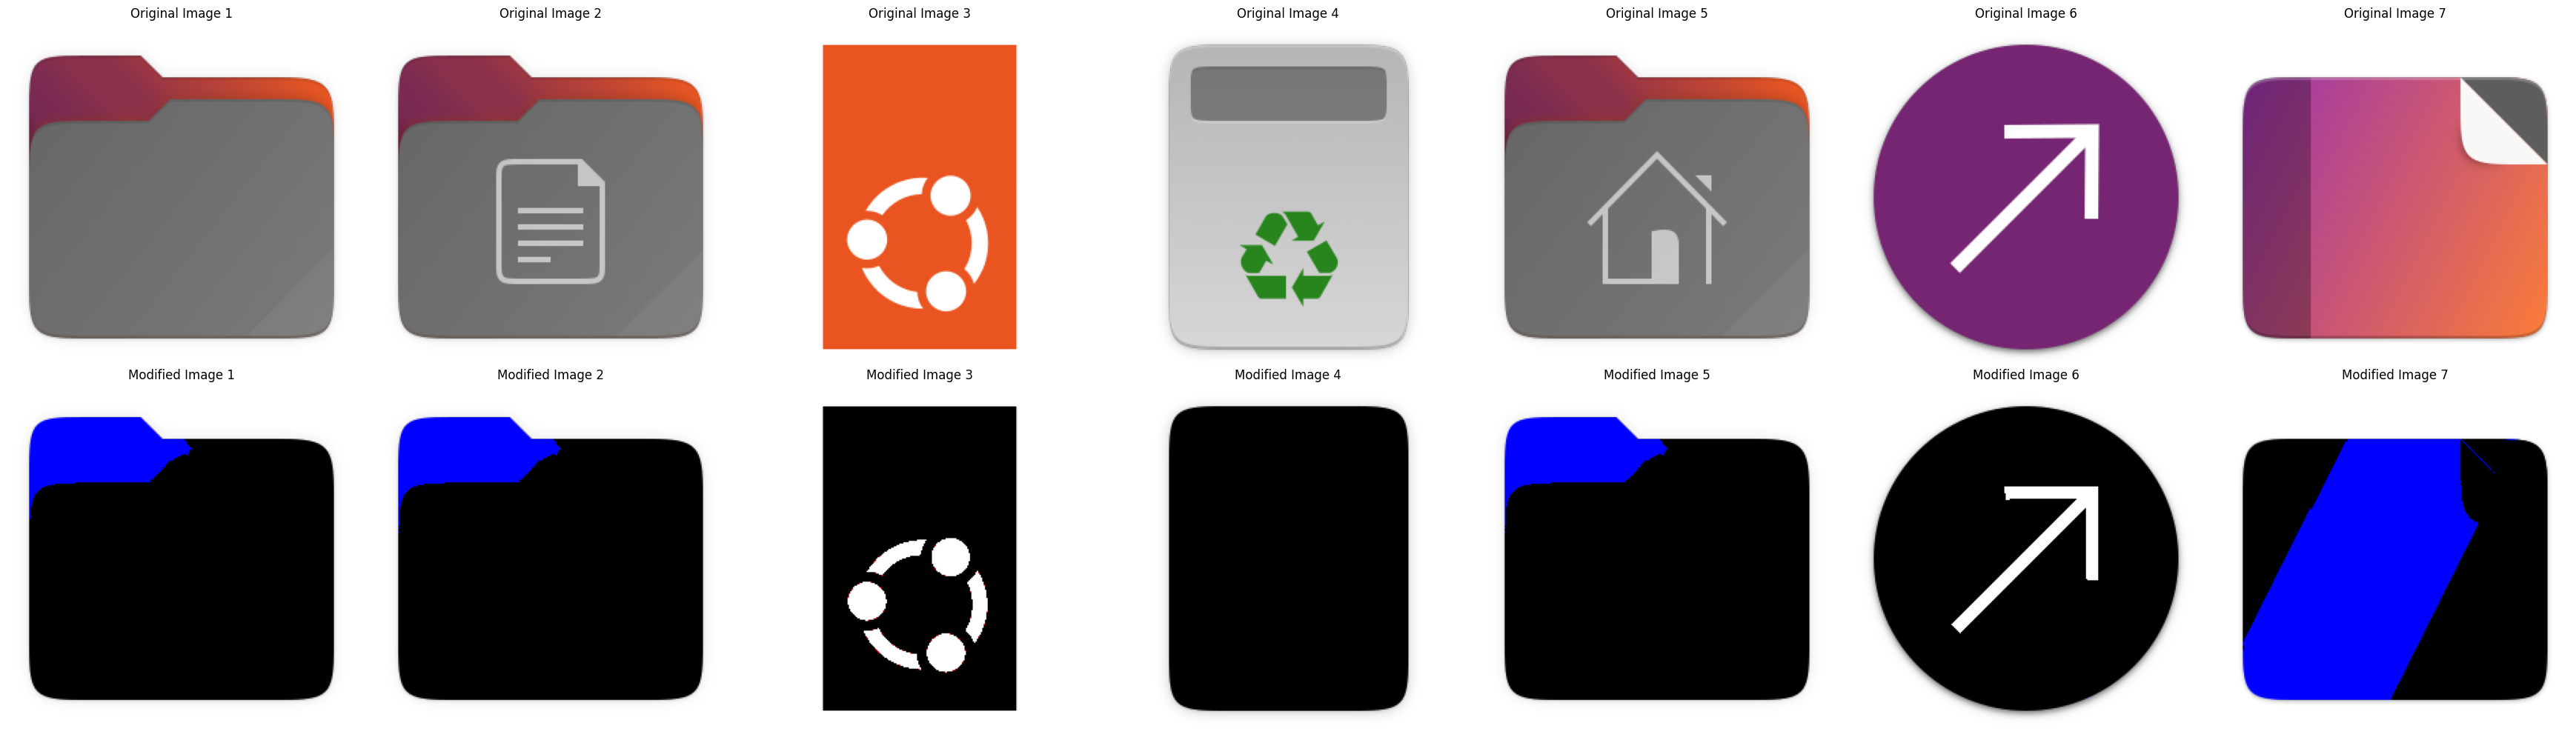

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

# Define fixed RGB colors
fixed_rgb_target = np.array(current_pixel_color[:3])  # Orange (RGB)
fixed_rgb_new = np.array([0, 0, 255])  # Blue (RGB)

# Convert fixed RGB to HSV
target_hsv = rgb_to_hsv(fixed_rgb_target / 255.0)
new_hsv_color = rgb_to_hsv(fixed_rgb_new / 255.0)

# Define color similarity threshold
threshold = 0.1

# Process each image
modified_images = []

for img in icons_to_colorize:
    # Extract the alpha channel (if image has transparency)
    if img.shape[-1] == 4:  # If RGBA
        alpha_channel = img[:, :, 3]  # Save Alpha
        rgb_img = img[:, :, :3]  # Extract RGB
    else:
        alpha_channel = None  # No alpha
        rgb_img = img  # Keep as is

    # Convert RGB to HSV
    hsv_img = rgb_to_hsv(rgb_img / 255.0)  # Normalize to [0,1] before conversion

    # Compute absolute difference in Hue
    hue_diff = np.abs(hsv_img[:, :, 0] - target_hsv[0])

    # Create a mask for pixels close to the target hue
    mask = hue_diff < threshold

    # Replace only those pixels with the new color
    hsv_img[mask] = new_hsv_color

    # Convert back to RGB
    modified_rgb = hsv_to_rgb(hsv_img) * 255  # Scale back to [0,255]

    # Clip the values to ensure they fall within [0, 255]
    modified_rgb = np.clip(modified_rgb, 0, 255)

    # Convert to integers
    modified_rgb = modified_rgb.astype(np.uint8)

    # Reattach the alpha channel (if it existed)
    if alpha_channel is not None:
        modified_rgba = np.dstack((modified_rgb, alpha_channel))  # Add back alpha
    else:
        modified_rgba = modified_rgb  # No alpha to restore

    # Append modified image
    modified_images.append(modified_rgba)

# Plot original and modified images
fig, axs = plt.subplots(2, len(icons_to_colorize), figsize=(5 * len(icons_to_colorize), 10))

for i in range(len(icons_to_colorize)):
    # Show original
    axs[0, i].imshow(icons_to_colorize[i])
    axs[0, i].set_title(f"Original Image {i+1}")
    axs[0, i].axis("off")

    # Show modified
    axs[1, i].imshow(modified_images[i])
    axs[1, i].set_title(f"Modified Image {i+1}")
    axs[1, i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()
